In [23]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import sklearn.metrics as sm # Permet de calculer certaines mesures

df = pd.read_csv('../Data/Wage.csv') # Importation du jeux de données Wage 
age = df['age'] 
wage = df['wage']
print(np.shape(age))
age = age.values.reshape(-1,1)
wage = wage.values.reshape(-1,1) # On transforme wage en numpy ndarray de taille n x 1 

(3000,)


KRR complexity and bandwidth selected and model fitted in 29.778 s
KRR prediction for 2500 inputs in 0.133 s


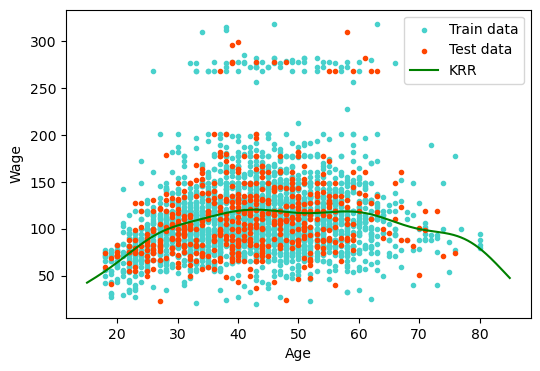

In [24]:
from sklearn.svm import SVR # Support Vector Model
from sklearn.model_selection import GridSearchCV # génère des candidats à partir d'une grille de valeurs de paramètres spécifiées
from sklearn.model_selection import learning_curve # Détermine les scores d'entraînement et de test validés de manière croisée 
from sklearn.model_selection import train_test_split # Sépare l'échantillon en train et test échantillon
from sklearn.kernel_ridge import KernelRidge # Permet d'utiliser la méthode Ridge par noyaux

#########
# Generate sample data
X_train = age[:2500] # Les 2500 premières obs
X_test = age[2501:] # Le reste
y_train = wage[:2500] 
y_test = wage[2501:]

# Fit regression model

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1),
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})
# Utiliser la méthode Kernel Ridge sur une grille de paramètres 
# pour les hyper-paramètres du modèle

t0 = time.time()
kr.fit(X_train, y_train) # Méthode d'estimation du modèle
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s"% kr_fit)

t0 = time.time()

X_plot = np.linspace(15, 85, 2500)[:, None]
y_kr = kr.predict(X_plot)
kr_predict = time.time() - t0 # Méthode de prévision du modèle
print("KRR prediction for %d inputs in %.3f s"
      % (X_train.shape[0], kr_predict))

# Look at the results

fig = plt.figure(1, figsize=(6, 4))
plt.scatter(X_train, y_train, c='mediumturquoise', label='Train data', zorder=1, marker='.')
plt.scatter(X_test, y_test, c='orangered', label='Test data', zorder=1, marker='.')

plt.plot(X_plot, y_kr, c='g',label='KRR')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.legend()

plt.show()

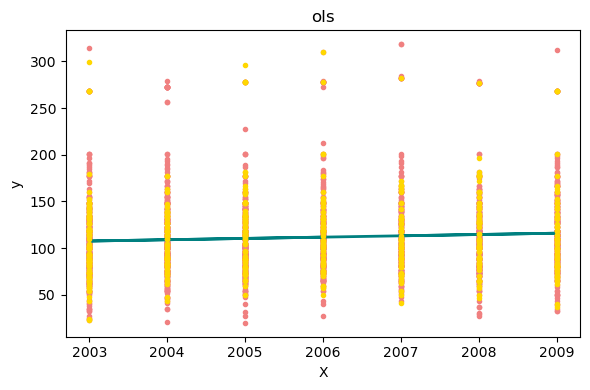

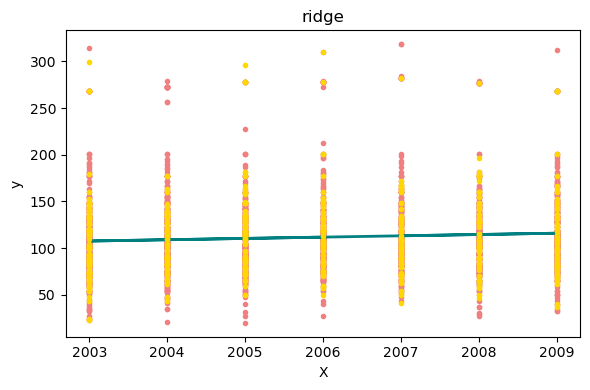

In [25]:
from sklearn import linear_model # Méthode de régression linéaire

# On va utiliser la régression linéaire et la régression Ridge
classifiers = dict(ols=linear_model.LinearRegression(),
                   ridge=linear_model.Ridge(alpha=.1)) 
X = df['year'].values.reshape(-1,1) # ndarray n x 1
X_train = X[:2500]
X_test = X[2501:]

for name, clf in classifiers.items(): # Boucle sur les deux méthodes
    fig, ax = plt.subplots(figsize=(6, 4))
    clf.fit(X_train, y_train) # On estime ols puis ridge
    ax.plot(X_train, clf.predict(X_train), linewidth=2, color='teal')
    ax.scatter(X_train, y_train, c='lightcoral', marker='.', zorder=1)
    ax.scatter(X_test, y_test, c='gold', marker='.', zorder=2)

    ax.set_title(name)
    ax.set_xlabel('X')
    ax.set_ylabel('y')

    fig.tight_layout()

plt.show()

      year  age            maritl      race        education  \
0     2006   18  1. Never Married  1. White     1. < HS Grad   
1     2004   24  1. Never Married  1. White  4. College Grad   
2     2003   45        2. Married  1. White  3. Some College   
3     2003   43        2. Married  3. Asian  4. College Grad   
4     2005   50       4. Divorced  1. White       2. HS Grad   
...    ...  ...               ...       ...              ...   
2995  2008   44        2. Married  1. White  3. Some College   
2996  2007   30        2. Married  1. White       2. HS Grad   
2997  2005   27        2. Married  2. Black     1. < HS Grad   
2998  2005   27  1. Never Married  1. White  3. Some College   
2999  2009   55      5. Separated  1. White       2. HS Grad   

                  region        jobclass          health health_ins   logwage  \
0     2. Middle Atlantic   1. Industrial       1. <=Good      2. No  4.318063   
1     2. Middle Atlantic  2. Information  2. >=Very Good      2. No  

/tmp/ipykernel_161439/3774986363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.education[df.education == '1. < HS Grad'] = 1
/tmp/ipykernel_161439/3774986363.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.education[df.education == '2. HS Grad'] = 2
/tmp/ipykernel_161439/3774986363.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.education[df.education == '3. Some College'] = 3
/tmp/ipykernel_161439/3774986363.py:

<AxesSubplot:xlabel='education', ylabel='wage'>

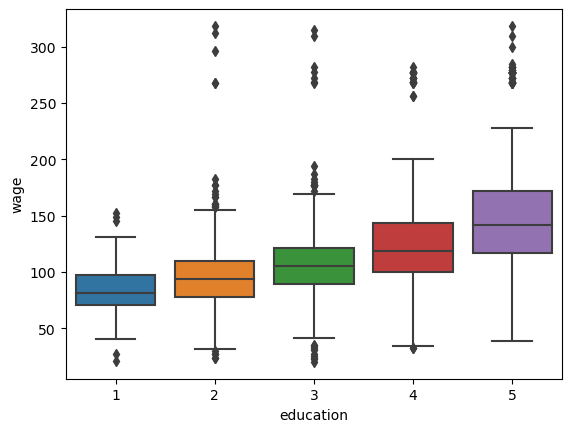

In [26]:
print(df)
# On transforme la variable éducation en variable numérique
df.education[df.education == '1. < HS Grad'] = 1
df.education[df.education == '2. HS Grad'] = 2
df.education[df.education == '3. Some College'] = 3
df.education[df.education == '4. College Grad'] = 4
df.education[df.education == '5. Advanced Degree'] = 5
sns.boxplot(x="education", y="wage", data=df)

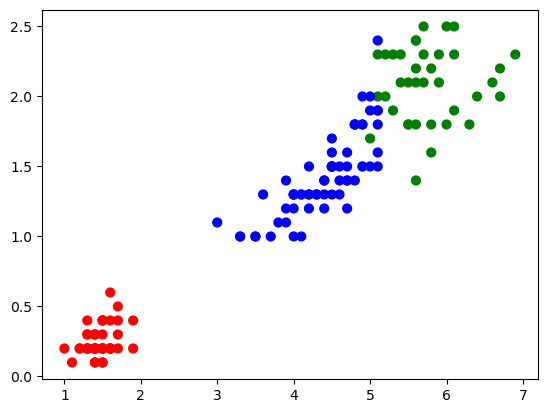

In [7]:
from sklearn.cluster import KMeans # Méthodes Kmeans
from sklearn import datasets

iris = datasets.load_iris() # On charge le jeu de données des IRIS
df=pd.DataFrame(iris.data)
df.columns=['Sepal_long','Sepal_large','Petal_long','Petal_large'] # On renome les colonnes

# Cluster K-means
model=KMeans(n_clusters=3) # On définit le modèle et le nombre de classe

# Adapter le modèle de données

model.fit(df) 

colormap = np.array(['Red','green','blue'])

plt.scatter(df.Petal_long, df.Petal_large,c=colormap[model.labels_],s=40)

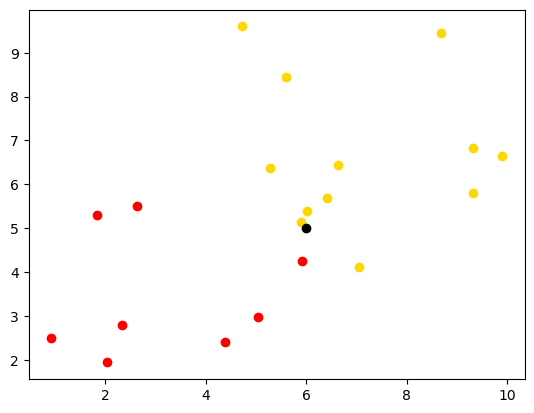

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt

x_11 = np.random.uniform(0,6,size=(8, 1)) # Loi uniforme entre 0-6
x_12 = np.random.uniform(0,6,size=(8, 1)) # Loi uniforme entre 0-6
plt.scatter(x_11, x_12, c='r')
x_11 = np.random.uniform(4,10,size=(12, 1))
x_12 = np.random.uniform(4,10,size=(12, 1))
plt.scatter(x_11, x_12, c='gold')
x_11 = 6 
x_12 = 5
plt.scatter(x_11, x_12, c = 'black')

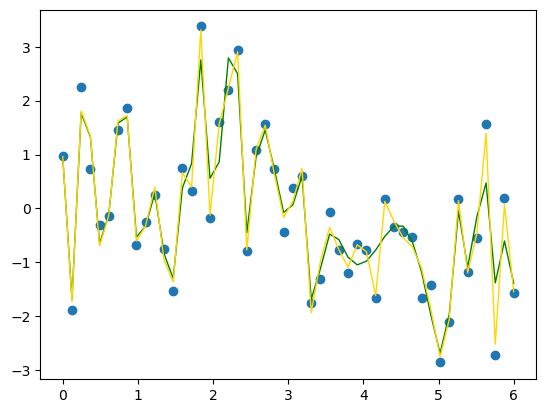

In [9]:
from scipy.interpolate import UnivariateSpline # Spline univarié

x_pts = np.linspace(0,6,50) # On définit la plage des x: 50 entre 0 et 6. 
y_pts = np.sin(x_pts) # y = sin(x)
for i in range(0,50):
    y_pts[i] = y_pts[i] + np.random.normal() # On ajoute un bruit
plt.scatter(x_pts, y_pts)

spl = UnivariateSpline(x_pts, y_pts)
spl.set_smoothing_factor(10)
xs = np.linspace(0, 6, 50)
plt.plot(xs, spl(xs), 'g', lw=1)

spl.set_smoothing_factor(2)
plt.plot(xs, spl(xs), 'gold', lw=1)

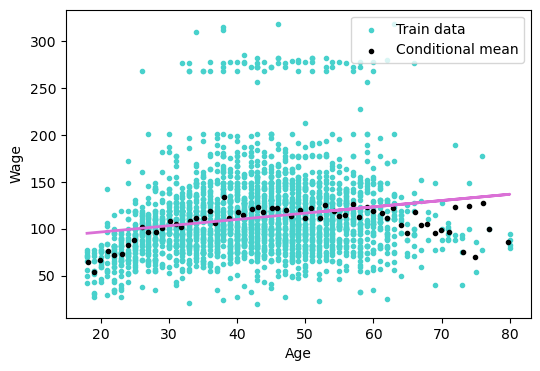

In [10]:
from scipy import stats
from sklearn import linear_model

#########
# Generate sample data
X_train = age[:2500].ravel()
X_test = age[2501:]
y_train = wage[:2500].ravel()
y_test = wage[2501:]

# Conditional mean

n_bins = 150
cond_means, bin_edges, bin_number = stats.binned_statistic(X_train, y_train, statistic='mean', bins=n_bins)
bin_width = bin_edges[1] - bin_edges[0]
bin_centres = bin_edges[1:] - bin_width/2

# Régression Linéaire

X_train = age[:2500]
y_train = wage[:2500]
ols=linear_model.LinearRegression()
ols.fit(X_train, y_train)

# Look at the results

fig = plt.figure(1, figsize=(6, 4))
plt.scatter(X_train, y_train, c='mediumturquoise', label='Train data', zorder=1, marker='.')
plt.scatter(bin_centres, cond_means, color = 'black', label = 'Conditional mean', marker='.')
plt.plot(X_train, ols.predict(X_train), linewidth=2, color='orchid')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.legend()
plt.show()

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


df = pd.read_csv("../Data/default.csv")
df['EDUCATION']=np.where(df['EDUCATION'] == 5, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 6, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 0, 4, df['EDUCATION'])

target = 'default'
predictors = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X = df[predictors].copy()
y = df['default'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[4529  158]
 [ 989  324]]
Accuracy0.8088333333333333


[-0.75583192  0.25715034]
2.939260839666304


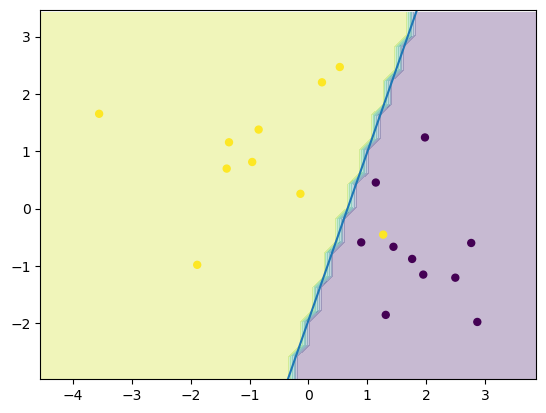

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

np.random.seed(0)
X = np.r_[np.random.randn(10, 2) - [-1, 1], np.random.randn(10, 2) + [-1, 1]]
Y = [0] * 10 + [1] * 10

fig, ax = plt.subplots()
clf2 = svm.LinearSVC(C=1).fit(X, Y)

# get the separating hyperplane
w = clf2.coef_[0]
print(w)
a = -w[0] / w[1]
print(a)
xx = np.linspace(-5, 5)
yy = a * xx - (clf2.intercept_[0]) / w[1]

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))
Z = clf2.predict(np.c_[xx2.ravel(), yy2.ravel()])

Z = Z.reshape(xx2.shape)
ax.contourf(xx2, yy2, Z, alpha=0.3)
ax.scatter(X[:, 0], X[:, 1], c=Y, s=25)
ax.plot(xx,yy)

ax.axis([x_min, x_max,y_min, y_max])
plt.show()

/home/user1/anaconda3/envs/Nanterre/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0.5, 1.0, 'SVC')

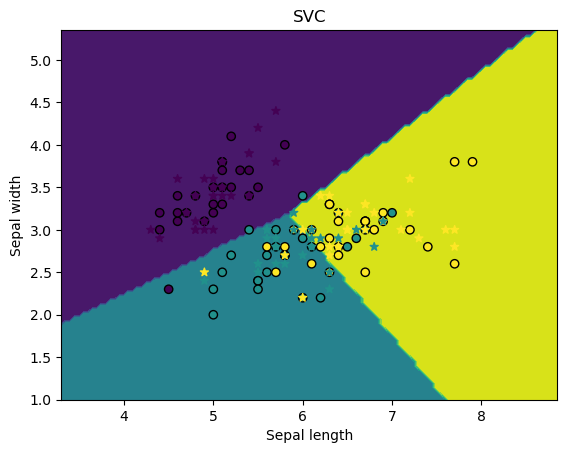

In [18]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# Chargement des données
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

C = 1.0 # paramètre de régularisation

lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

x_min = X[:, 0].min() - 1
x_max = X[:, 0].max() + 1
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z)
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("SVC")

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

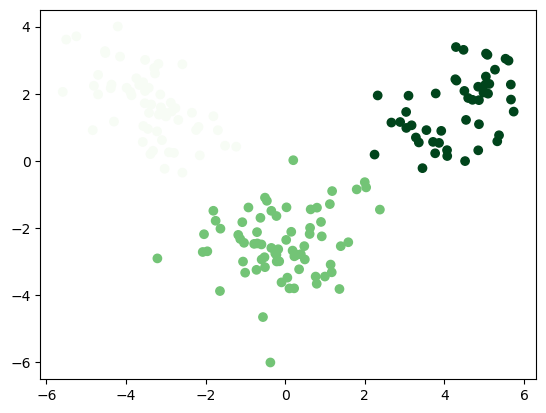

In [19]:
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_wine

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target
print(X)
print(y)

lda = LinearDiscriminantAnalysis()
fit_lda = lda.fit_transform(X, y)
print(fit_lda)
plt.scatter(fit_lda[:,0],
            fit_lda[:,1],
            c=y,
            cmap = 'Greens'
           )